# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    * 딥러닝
        * 모델 구조를 2가지 이상을 생성하고 모델링을 수행합니다.
        * epochs, learning_rate 등을 조절하며 성능을 튜닝합니다.
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.
        * 성능 가이드
            * MAE : 4 ~ 6
            * MAPE : 0.09~0.14

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [18]:
# path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [19]:
# from google.colab import drive
# drive.mount('/content/drive')

In [20]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [21]:
!pip install -r requirements.txt

  Using cached numpy-1.22.4.zip (11.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached xgboost-1.7.5-py3-none-win_amd64.whl (70.9 MB)
INFO: pip is looking at multiple versions of pandas to determine which version is compatible with other requirements. This could take a while.

The conflict is caused by:
    The user requested numpy==1.22.4
    pandas 1.5.3 depends on numpy>=1.21.0; python_version >= "3.10"
    pandas 1.5.3 depends on numpy>=1.23.2; python_version >= "3.11"

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict



ERROR: Cannot install numpy==1.22.4 and pandas==1.5.3 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.

# 한글 설정
plt.rc('font', family='Malgun Gothic')

# 모든 행과 열을 보여주기 위한 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl

In [2]:
file1 = 'data2.pkl'


In [3]:
from joblib import load

# data2.pkl 파일 불러오기
df = load(file1)

## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

In [4]:
df.head()

,Date,Car_Cnt,Request_Cnt,Ride_Cnt,Avg_Waiting_Time,Avg_Fare,Avg_Distance,WeekDay,Month,Year,Next_AVG_Waiting_Time,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),Rain_Value,Sunshine_Value,Season,Riding_Rate,work_rest,7day_Avg_Waiting_Time
0,2015-01-01,213,1023,924,23.2,2427,10764,목,1,2015,17.2,-2.0,-8.9,0.0,63.0,28.0,9.07,비가 오지않음,낮은 일사량,겨울,0.9032,쉬는날,23.2
1,2015-01-02,420,3158,2839,17.2,2216,8611,금,1,2015,26.2,2.4,-9.2,0.0,73.0,37.0,8.66,비가 오지않음,낮은 일사량,겨울,0.8990,일하는 날,20.2
2,2015-01-03,209,1648,1514,26.2,2377,10198,토,1,2015,24.5,8.2,0.2,0.0,89.0,58.0,5.32,비가 오지않음,낮은 일사량,겨울,0.9187,쉬는날,22.2
3,2015-01-04,196,1646,1526,24.5,2431,10955,일,1,2015,26.2,7.9,-0.9,0.0,95.0,52.0,6.48,비가 오지않음,낮은 일사량,겨울,0.9271,쉬는날,22.8
4,2015-01-05,421,4250,3730,26.2,2214,8663,월,1,2015,23.6,4.1,-7.4,3.4,98.0,29.0,10.47,적은 강수량,보통 일사량,겨울,0.8776,일하는 날,23.5


In [5]:
### (1) Y(Target)에 비교적 무의미한 변수 제거
df = df[['Riding_Rate', 'Avg_Waiting_Time', '7day_Avg_Waiting_Time', 'Year', 'Season', 'Next_AVG_Waiting_Time']]

In [27]:
df.head(5)

,Riding_Rate,Avg_Waiting_Time,7day_Avg_Waiting_Time,Year,Season,Next_AVG_Waiting_Time
0,0.9032,23.2,23.2,2015,겨울,17.2
1,0.8990,17.2,20.2,2015,겨울,26.2
2,0.9187,26.2,22.2,2015,겨울,24.5
3,0.9271,24.5,22.8,2015,겨울,26.2
4,0.8776,26.2,23.5,2015,겨울,23.6


### (1) NA 조치

In [28]:
df.isna().sum()

Riding_Rate              0
Avg_Waiting_Time         0
7day_Avg_Waiting_Time    0
Year                     0
Season                   0
Next_AVG_Waiting_Time    0
dtype: int64

### (2) 가변수화

In [6]:
df = pd.get_dummies(df, columns=['Year',  'Season'], drop_first=True)

In [7]:
df.head(1)

,Riding_Rate,Avg_Waiting_Time,7day_Avg_Waiting_Time,Next_AVG_Waiting_Time,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Season_겨울,Season_봄,Season_여름
0,0.9032,23.2,23.2,17.2,0,0,0,0,0,0,0,1,0,0


In [31]:
len(df.columns)

14

### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

#### 1) x, y 나누기

In [8]:
x = df.drop('Next_AVG_Waiting_Time', axis=1)
y = df['Next_AVG_Waiting_Time']

In [33]:
x.head(1)

,Riding_Rate,Avg_Waiting_Time,7day_Avg_Waiting_Time,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Season_겨울,Season_봄,Season_여름
0,0.9032,23.2,23.2,0,0,0,0,0,0,0,1,0,0


In [34]:
y.head(1)

0    17.2
Name: Next_AVG_Waiting_Time, dtype: float64

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=91, shuffle=False)

In [11]:
y_test = y_test.reset_index(drop=True)

In [37]:
x_train.columns

Index(['Riding_Rate', 'Avg_Waiting_Time', '7day_Avg_Waiting_Time', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021',
       'Year_2022', 'Season_겨울', 'Season_봄', 'Season_여름'],
      dtype='object')

In [38]:
x_test.columns

Index(['Riding_Rate', 'Avg_Waiting_Time', '7day_Avg_Waiting_Time', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021',
       'Year_2022', 'Season_겨울', 'Season_봄', 'Season_여름'],
      dtype='object')

In [12]:
x_train.head(1)

,Riding_Rate,Avg_Waiting_Time,7day_Avg_Waiting_Time,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Season_겨울,Season_봄,Season_여름
0,0.9032,23.2,23.2,0,0,0,0,0,0,0,1,0,0


### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.
* 모든 값을 0 ~ 1로 맞춰주면, 학습 및 평가하는데 용이하다.

In [13]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [14]:
# 스케일링된 데이터를 데이터프레임으로 변환

# 학습 데이터와 평가 데이터에 대하여 transform
fit_x = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
test_x = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [15]:
fit_x.head(1)

,Riding_Rate,Avg_Waiting_Time,7day_Avg_Waiting_Time,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Season_겨울,Season_봄,Season_여름
0,0.823561,0.076046,0.067588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
test_x.head(1)

,Riding_Rate,Avg_Waiting_Time,7day_Avg_Waiting_Time,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Season_겨울,Season_봄,Season_여름
0,0.661377,0.243346,0.390169,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 학습용, 평가용 데이터
- 학습용 fit_x    ->       y_train<br>

- 평가용 test_x     ->     y_test

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 딥러닝 모델 구조 2가지 이상을 설계하고 모델을 생성합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [17]:
# 라이브러리 설치
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgbm

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import *

In [28]:
# 실제값과 예측값을 시각화(라인차트)하는 함수
def show(real, predict):
    # index = [1, 2, 3, 4, 5, 6, 7 ,8 ,9 ,10]
    plt.plot(real, label='real_value')
    plt.plot(predict, label='predict_value')
    plt.title('y에 대한 실제값과 예측값')
    plt.legend()
    plt.show()
    

### (1) 머신러닝

#### 1) 모델1 (LinearRegression)

예측값 10개 :  [42.  36.5 41.  43.  42.8 42.5 43.2 42.7 39.7 45.3]
실제값 10개 :  [24.9, 41.0, 48.4, 46.5, 46.0, 53.1, 42.6, 30.9, 48.8, 48.9]
MAE :  4.681228592094681
MAPE :  0.11503489272278701


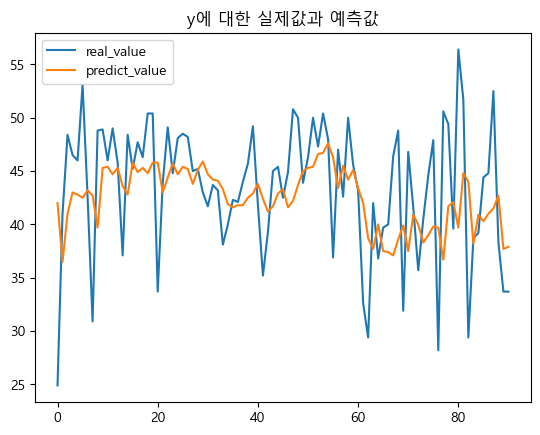

In [29]:
model = LinearRegression()

model.fit(fit_x, y_train)

y_pred = model.predict(test_x)
print('예측값 10개 : ', np.around(y_pred[0:10:1], 1))
print('실제값 10개 : ', list(y_test[0:10:1]))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))

show(list(y_test), list(np.around(y_pred, 1)))

#### 2) 모델2 (KNN)

예측값 10개 :  [40.9 39.4 44.5 46.6 46.6 47.  35.8 46.9 38.5 45.2]
실제값 10개 :  [24.9, 41.0, 48.4, 46.5, 46.0, 53.1, 42.6, 30.9, 48.8, 48.9]
MAE :  6.228131868131869
MAPE :  0.14375041736556243


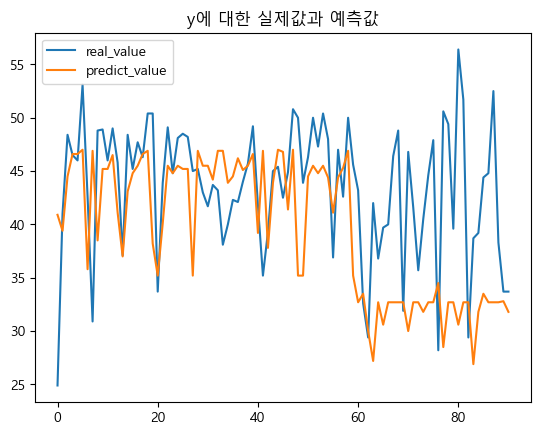

In [31]:
model = KNeighborsRegressor()

model.fit(fit_x, y_train)

y_pred = model.predict(test_x)
print('예측값 10개 : ', np.around(y_pred[0:10:1], 1))
print('실제값 10개 : ', list(y_test[0:10:1]))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))

show(list(y_test), list(np.around(y_pred, 1)))

#### 2) Grid Serach (파라미터 튜닝)

최적의 파라미터: {'n_neighbors': 18}
최고 점수: -0.26231920575096634
예측값 10개 :  [44.  42.7 43.7 42.8 43.4 42.6 41.5 43.  42.8 41.9]
실제값 10개 :  [24.9, 41.0, 48.4, 46.5, 46.0, 53.1, 42.6, 30.9, 48.8, 48.9]
MAE :  6.490903540903541
MAPE :  0.14822245082193317


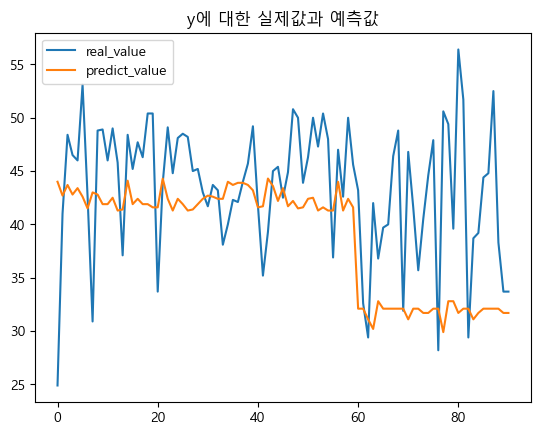

In [32]:
params = {'n_neighbors' : range(1, 25, 1)}
KNN = KNeighborsRegressor()
model = GridSearchCV(KNN, params, cv=10)
model.fit(fit_x, y_train)
y_pred = model.predict(test_x)

best_parameters = model.best_params_
best_score = model.best_score_
print("최적의 파라미터:", best_parameters)
print("최고 점수:", best_score)

print('예측값 10개 : ', np.around(y_pred[0:10:1], 1))
print('실제값 10개 : ', list(y_test[0:10:1]))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))

show(list(y_test), list(np.around(y_pred, 1)))

#### 3) 모델3 (Decision Tree)

<class 'numpy.ndarray'>
예측값 10개 :  [51.2 32.5 52.5 49.2 49.2 44.6 46.2 49.4 34.  33.1]
실제값 10개 :  [24.9, 41.0, 48.4, 46.5, 46.0, 53.1, 42.6, 30.9, 48.8, 48.9]
MAE :  7.882417582417582
MAPE :  0.18868577546930118


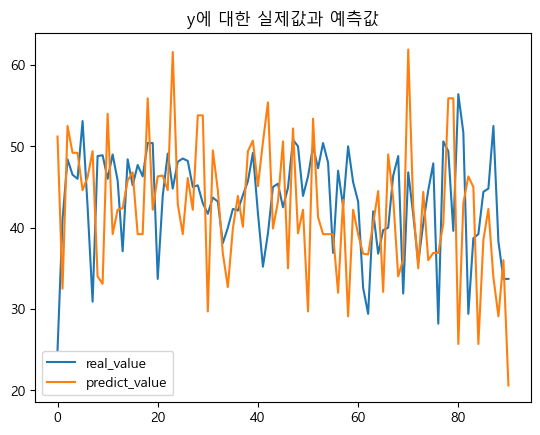

In [33]:
model = DecisionTreeRegressor()

model.fit(fit_x, y_train)

y_pred = model.predict(test_x)
print(type(y_pred))
print('예측값 10개 : ', np.around(y_pred[0:10:1], 1))
print('실제값 10개 : ', list(y_test[0:10:1]))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))

show(list(y_test), list(np.around(y_pred, 1)))

#### 3) Grid Serach (파라미터 튜닝)

최적의 파라미터: {'max_depth': 3}
최고 점수: 0.25823037532217796
예측값 10개 :  [41.  35.4 41.  41.  41.  41.  41.  41.  35.4 41. ]
실제값 10개 :  [24.9, 41.0, 48.4, 46.5, 46.0, 53.1, 42.6, 30.9, 48.8, 48.9]
MAE :  6.03396466752313
MAPE :  0.14466071046143342


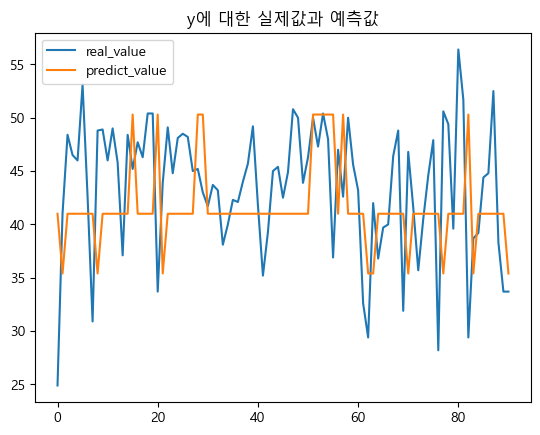

In [35]:

params = {'max_depth' : range(1, 25, 1)}
Decision_Tree = DecisionTreeRegressor()
model = GridSearchCV(Decision_Tree, params, cv=10)
model.fit(fit_x, y_train)
y_pred = model.predict(test_x)

best_parameters = model.best_params_
best_score = model.best_score_
print("최적의 파라미터:", best_parameters)
print("최고 점수:", best_score)

print('예측값 10개 : ', np.around(y_pred[0:10:1], 1))
print('실제값 10개 : ', list(y_test[0:10:1]))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))

show(list(y_test), list(np.around(y_pred, 1)))

#### 4) 모델4 (Random Forest)

예측값 10개 :  [37.  34.6 45.4 48.2 44.8 40.3 43.7 46.5 39.9 40.8]
실제값 10개 :  [24.9, 41.0, 48.4, 46.5, 46.0, 53.1, 42.6, 30.9, 48.8, 48.9]
MAE :  5.510769230769234
MAPE :  0.13250523077705836


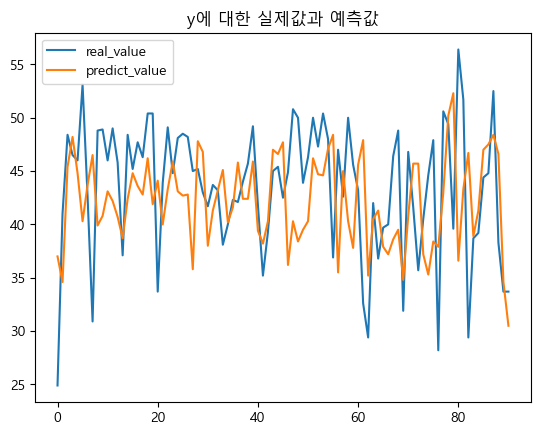

In [38]:
model = RandomForestRegressor(n_estimators=100, max_depth=None)

model.fit(fit_x, y_train)

y_pred = model.predict(test_x)
print('예측값 10개 : ', np.around(y_pred[0:10:1], 1))
print('실제값 10개 : ', list(y_test[0:10:1]))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))

show(list(y_test), list(np.around(y_pred, 1)))

#### 4) Grid Serach (파라미터 튜닝)

최적의 파라미터: {'max_depth': 3}
최고 점수: 0.2910102108804329
예측값 10개 :  [40.1 37.2 41.4 41.4 41.4 41.4 41.5 41.8 38.4 42.9]
실제값 10개 :  [24.9, 41.0, 48.4, 46.5, 46.0, 53.1, 42.6, 30.9, 48.8, 48.9]
MAE :  5.220868851587728
MAPE :  0.12696793594569272


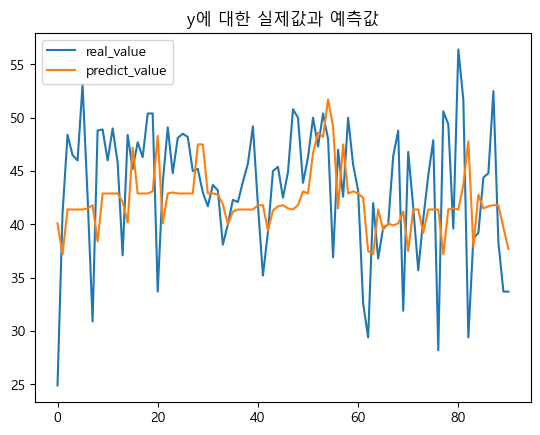

In [39]:
params = {'max_depth' : range(1, 25, 1)}
RandomForest = RandomForestRegressor()
model = GridSearchCV(RandomForest, params, cv=10)
model.fit(fit_x, y_train)
y_pred = model.predict(test_x)

best_parameters = model.best_params_
best_score = model.best_score_
print("최적의 파라미터:", best_parameters)
print("최고 점수:", best_score)

print('예측값 10개 : ', np.around(y_pred[0:10:1], 1))
print('실제값 10개 : ', list(y_test[0:10:1]))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))

show(list(y_test), list(np.around(y_pred, 1)))

#### 5) 모델5 (XGBoost)

예측값 10개 :  [42.7 40.9 45.3 44.2 39.  41.1 48.2 47.1 40.9 43.2]
실제값 10개 :  [24.9, 41.0, 48.4, 46.5, 46.0, 53.1, 42.6, 30.9, 48.8, 48.9]
MAE :  6.417734058086689
MAPE :  0.15176968296621277


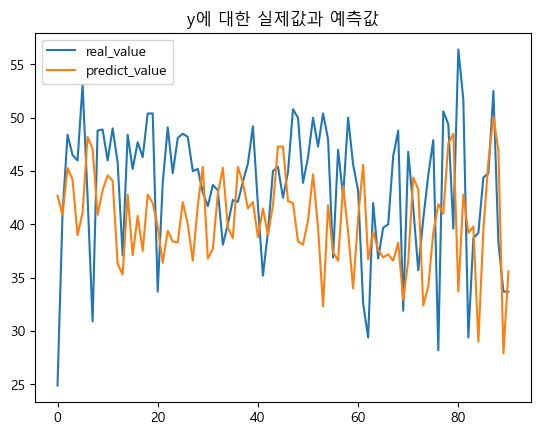

In [40]:
model = xgb.XGBRegressor( n_estimators=100, max_depth=None )

model.fit(fit_x, y_train)

y_pred = model.predict(test_x)

print('예측값 10개 : ', np.around(y_pred[0:10:1], 1))
print('실제값 10개 : ', list(y_test[0:10:1]))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))

show(list(y_test), list(np.around(y_pred, 1)))

#### 5) Grid Serach (파라미터 튜닝)

최적의 파라미터: {'max_depth': 1}
최고 점수: 0.23512580900795185
예측값 10개 :  [39.7 35.  42.2 42.2 42.2 41.3 44.5 42.8 38.8 41.9]
실제값 10개 :  [24.9, 41.0, 48.4, 46.5, 46.0, 53.1, 42.6, 30.9, 48.8, 48.9]
MAE :  5.414486702719887
MAPE :  0.13183019984777508


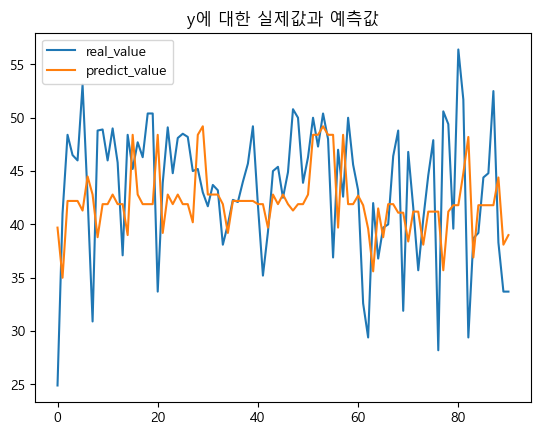

In [41]:
params = {'max_depth' : range(1, 25, 1)}
XGBoost = xgb.XGBRegressor()
model = GridSearchCV(XGBoost, params, cv=10)
model.fit(fit_x, y_train)
y_pred = model.predict(test_x)

best_parameters = model.best_params_
best_score = model.best_score_
print("최적의 파라미터:", best_parameters)
print("최고 점수:", best_score)

print('예측값 10개 : ', np.around(y_pred[0:10:1], 1))
print('실제값 10개 : ', list(y_test[0:10:1]))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))

show(list(y_test), list(np.around(y_pred, 1)))

#### 6) 모델6 (LightGBM)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 2831, number of used features: 13
[LightGBM] [Info] Start training from score 40.206782
예측값 10개 :  [39.8 35.1 44.2 44.6 42.5 43.5 48.1 45.1 42.4 42.7]
실제값 10개 :  [24.9, 41.0, 48.4, 46.5, 46.0, 53.1, 42.6, 30.9, 48.8, 48.9]
MAE :  5.623559613210638
MAPE :  0.13495094371520613


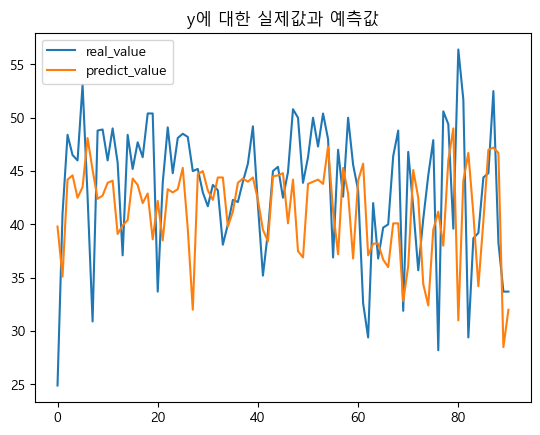

In [42]:
model = lgbm.LGBMRegressor( n_estimators=100, max_depth=None )

model.fit(fit_x, y_train)

y_pred = model.predict(test_x)

print('예측값 10개 : ', np.around(y_pred[0:10:1], 1))
print('실제값 10개 : ', list(y_test[0:10:1]))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))

show(list(y_test), list(np.around(y_pred, 1)))

#### 6) Grid Serach (파라미터 튜닝)

최적의 파라미터: {'max_depth': 2}
최고 점수: 0.33704408868492874
예측값 10개 :  [42.2 35.9 42.3 42.3 42.3 41.7 43.7 43.4 40.1 43.3]
실제값 10개 :  [24.9, 41.0, 48.4, 46.5, 46.0, 53.1, 42.6, 30.9, 48.8, 48.9]
MAE :  5.045289207859661
MAPE :  0.12423316456217835


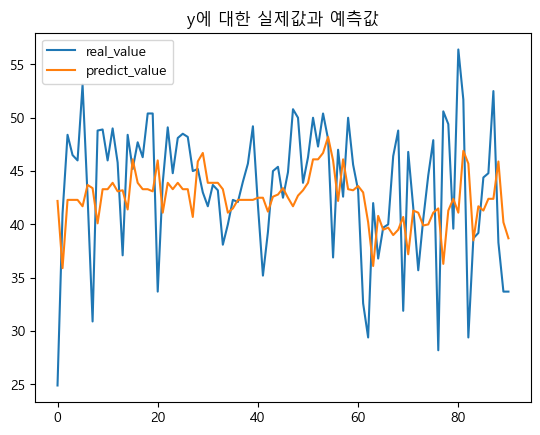

In [43]:
params = {'max_depth' : range(1, 25, 1)}  # LightGBM 메시지 숨기기
LightGBM = lgbm.LGBMRegressor(verbose=-1)
model = GridSearchCV(LightGBM, params, cv=10)
model.fit(fit_x, y_train)
y_pred = model.predict(test_x)

best_parameters = model.best_params_
best_score = model.best_score_
print("최적의 파라미터:", best_parameters)
print("최고 점수:", best_score)

print('예측값 10개 : ', np.around(y_pred[0:10:1], 1))
print('실제값 10개 : ', list(y_test[0:10:1]))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))

show(list(y_test), list(np.around(y_pred, 1)))

### (2) 딥러닝

In [44]:
# 딥러닝에 필요한 라이브러리 설치
import tensorflow as tf

#### 1) 모델1 - 은닉충 없는 것

In [45]:
# 모델의 구조를 형성한다.
X = tf.keras.Input(shape=[13])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.Model(X, Y)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
             loss=tf.keras.losses.mean_squared_error,
             metrics=['mae', 'mape'])

In [46]:
# 학습한다.

# 모델이 과적합에 걸리지 않도록, 과적합 되기 직전 상태로 만든다.
early_stop = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model.fit(fit_x, y_train, batch_size=100, epochs=500, verbose=1, validation_split=0.3, callbacks=[early_stop])

Epoch 1/500
20/20 [==============================] - 1s 40ms/step - loss: 2041.3883 - mae: 42.8268 - mape: 97.4338 - val_loss: 1006.8797 - val_mae: 30.4904 - val_mape: 96.2588
Epoch 2/500
20/20 [==============================] - 0s 6ms/step - loss: 1908.7760 - mae: 41.2749 - mape: 93.5482 - val_loss: 934.2217 - val_mae: 29.2660 - val_mape: 92.0519
Epoch 3/500
20/20 [==============================] - 0s 6ms/step - loss: 1782.5216 - mae: 39.7474 - mape: 89.7297 - val_loss: 866.1385 - val_mae: 28.0692 - val_mape: 87.9411
Epoch 4/500
20/20 [==============================] - 0s 6ms/step - loss: 1663.4395 - mae: 38.2518 - mape: 85.9953 - val_loss: 802.2043 - val_mae: 26.8951 - val_mape: 83.9084
Epoch 5/500
20/20 [==============================] - 0s 6ms/step - loss: 1551.5667 - mae: 36.7841 - mape: 82.3143 - val_loss: 742.2138 - val_mae: 25.7437 - val_mape: 79.9538
Epoch 6/500
20/20 [==============================] - 0s 6ms/step - loss: 1445.4668 - mae: 35.3500 - mape: 78.7525 - val_loss: 68

3/3 [==============================] - 0s 2ms/step
예측값 10개 :  [40.8 35.  40.2 42.4 42.1 41.7 42.3 41.7 38.1 44.3]
실제값 10개 :  [24.9, 41.0, 48.4, 46.5, 46.0, 53.1, 42.6, 30.9, 48.8, 48.9]


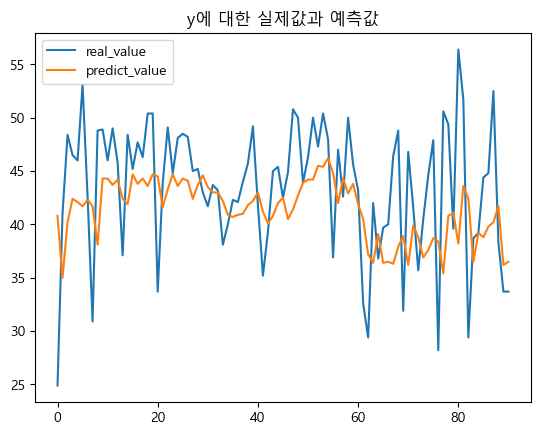

In [47]:
# 이용한다.
y_pred = model.predict(test_x)

predict =  np.around(y_pred[0:10:1], 1)
print('예측값 10개 : ', predict.flatten())
print('실제값 10개 : ',  list(y_test[0:10:1]))

show(list(y_test), list(np.around(y_pred, 1)))

In [48]:
# 이용한다.
model.evaluate(test_x, y_test)

3/3 [==============================] - 0s 8ms/step - loss: 40.4350 - mae: 5.0283 - mape: 12.0060


[40.43497848510742, 5.028273582458496, 12.005993843078613]

In [49]:
# 회귀 모델 평가 지표
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  5.028273454603259
MAPE :  0.1200599384431567


#### 2) 모델2 - 은닉층 존재

In [50]:
X = tf.keras.Input(shape=[13])
H = tf.keras.layers.Dense(1024, activation=tf.keras.activations.swish)(X)
H = tf.keras.layers.Dense(512, activation=tf.keras.activations.swish)(H)
H = tf.keras.layers.Dense(256, activation=tf.keras.activations.swish)(H)
H = tf.keras.layers.Dense(128, activation=tf.keras.activations.swish)(H)
Y = tf.keras.layers.Dense(1)(H)

model = tf.keras.Model(X, Y)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mae', 'mape'],)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              14336     
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 703489 (2.68 MB)
Trainable params: 703489 (2.

In [51]:
# 학습한다.

# 모델이 과적합에 걸리지 않도록, 과적합 되기 직전 상태로 만든다.
early_stop = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model.fit(fit_x, y_train, batch_size=50, epochs=500, verbose=1, validation_split=0.2, callbacks=[early_stop])

Epoch 1/500
46/46 [==============================] - 3s 24ms/step - loss: 410.9039 - mae: 13.8901 - mape: 35.1111 - val_loss: 47.2308 - val_mae: 5.3642 - val_mape: 16.7032
Epoch 2/500
46/46 [==============================] - 1s 13ms/step - loss: 89.2989 - mae: 6.8794 - mape: 17.5515 - val_loss: 42.6854 - val_mae: 5.2124 - val_mape: 15.6969
Epoch 3/500
46/46 [==============================] - 1s 15ms/step - loss: 88.9984 - mae: 7.0306 - mape: 18.0619 - val_loss: 52.1690 - val_mae: 5.9201 - val_mape: 16.7151
Epoch 4/500
46/46 [==============================] - 1s 16ms/step - loss: 88.4600 - mae: 6.8680 - mape: 17.4739 - val_loss: 42.8618 - val_mae: 5.1756 - val_mape: 15.6257
Epoch 5/500
46/46 [==============================] - 1s 12ms/step - loss: 87.1361 - mae: 6.8665 - mape: 17.4115 - val_loss: 39.2632 - val_mae: 4.8258 - val_mape: 15.0739
Epoch 6/500
46/46 [==============================] - 1s 12ms/step - loss: 90.7488 - mae: 6.9281 - mape: 17.5365 - val_loss: 72.9663 - val_mae: 6.863

3/3 [==============================] - 0s 5ms/step
예측값 10개 :  [39.2 32.9 39.4 41.6 41.3 41.1 42.4 40.7 36.7 43.1]
실제값 10개 :  [24.9, 41.0, 48.4, 46.5, 46.0, 53.1, 42.6, 30.9, 48.8, 48.9]


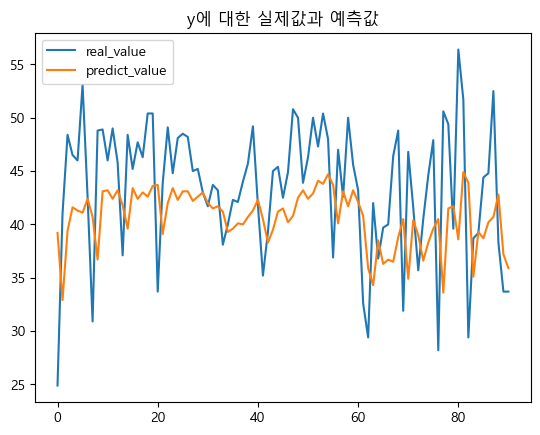

In [55]:
# 이용한다.
y_pred = model.predict(test_x)

predict =  np.around(y_pred[0:10:1], 1)
print('예측값 10개 : ', predict.flatten())
print('실제값 10개 : ',  list(y_test[0:10:1]))

show(list(y_test), list(np.around(y_pred, 1)))

In [56]:
# 이용한다.
model.evaluate(test_x, y_test)

3/3 [==============================] - 0s 7ms/step - loss: 45.6789 - mae: 5.5441 - mape: 13.1085


[45.67887878417969, 5.5440874099731445, 13.108461380004883]

In [57]:
# 회귀 모델 평가 지표
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  5.544088216928335
MAPE :  0.1310846159344078


#### 3) 모델3 - 은닉층 존재, BatchNormalization, Dropout, SkipConnection 등 다양한 방법 활용

In [58]:
# 모델 구조를 만든다.
X = tf.keras.Input(shape=[13])
H = tf.keras.layers.Dense(512)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.6)(H)
H = tf.keras.layers.Dense(256)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

for i in range(0, 10, 1):
    H1 = tf.keras.layers.Dropout(0.5)(H)
    H1 = tf.keras.layers.Dense(256)(H1)  # 이 부분을 수정
    H1 = tf.keras.layers.BatchNormalization()(H1)
    H1 = tf.keras.layers.Activation('swish')(H1)

    H1 = tf.keras.layers.Dense(256)(H1)  # 이 부분을 수정
    H1 = tf.keras.layers.BatchNormalization()(H1)
    H = tf.keras.layers.Add()([H, H1])
    H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.6)(H)
H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.5)(H)
H = tf.keras.layers.Dense(64)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

Y = tf.keras.layers.Dense(1)(H)

model = tf.keras.Model(X, Y)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.mean_squared_error,
              metrics=['mae', 'mape'],)

In [59]:
# 학습한다.

# 모델이 과적합에 걸리지 않도록, 과적합 되기 직전 상태로 만든다.
early_stop = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model.fit(fit_x, y_train, batch_size=128, epochs=1000, verbose=1, validation_split=0.2, callbacks=[early_stop])

Epoch 1/1000
18/18 [==============================] - 18s 126ms/step - loss: 1707.2633 - mae: 39.3877 - mape: 96.7173 - val_loss: 274065.6875 - val_mae: 361.7016 - val_mape: 961.2465
Epoch 2/1000
18/18 [==============================] - 1s 35ms/step - loss: 1206.2241 - mae: 32.9378 - mape: 83.2705 - val_loss: 25922.8633 - val_mae: 133.6403 - val_mape: 382.7010
Epoch 3/1000
18/18 [==============================] - 1s 35ms/step - loss: 616.5327 - mae: 22.4544 - mape: 57.3985 - val_loss: 1690.4375 - val_mae: 36.1586 - val_mape: 106.8024
Epoch 4/1000
18/18 [==============================] - 1s 66ms/step - loss: 201.0776 - mae: 11.1261 - mape: 28.1912 - val_loss: 1352.7922 - val_mae: 31.8118 - val_mape: 95.8615
Epoch 5/1000
18/18 [==============================] - 1s 62ms/step - loss: 111.9282 - mae: 8.1274 - mape: 21.8069 - val_loss: 428.7805 - val_mae: 18.0027 - val_mape: 53.7530
Epoch 6/1000
18/18 [==============================] - 1s 39ms/step - loss: 101.3316 - mae: 7.5913 - mape: 20.5

3/3 [==============================] - 1s 8ms/step
예측값 10개 :  [43.8 38.  43.2 48.3 47.5 46.2 44.9 46.4 40.4 52.4]
실제값 10개 :  [24.9, 41.0, 48.4, 46.5, 46.0, 53.1, 42.6, 30.9, 48.8, 48.9]


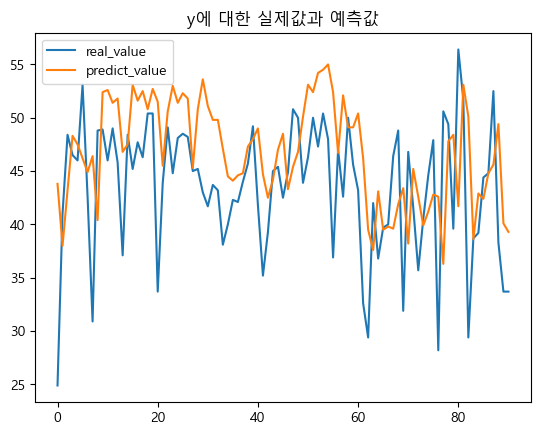

In [60]:
# 이용한다.
y_pred = model.predict(test_x)

predict =  np.around(y_pred[0:10:1], 1)
print('예측값 10개 : ', predict.flatten())
print('실제값 10개 : ',  list(y_test[0:10:1]))

show(list(y_test), list(np.around(y_pred, 1)))

In [61]:
# 이용한다.
model.evaluate(test_x, y_test)

3/3 [==============================] - 0s 16ms/step - loss: 53.9453 - mae: 5.7335 - mape: 14.5810


[53.945335388183594, 5.73351526260376, 14.580961227416992]

In [62]:
# 회귀 모델 평가 지표
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  5.733515209156078
MAPE :  0.1458095920793581


## 4.모델 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

- 머신러닝
  * Linear Regression - MAE :  4.681228592094681, MAPE :  0.11503489272278701
  
  * KNN (파라미터 튜닝 X) -  MAE :  6.228131868131869, MAPE : 0.14375041736556243
  * KNN (파라티터 튜닝) - MAE :  6.490903540903541, MAPE :  0.14822245082193317

  * Decision Tree (파라미터 튜닝 X) - MAE :  8.413186813186813, MAPE :  0.197878250228059
  * Decision Tree (파라미터 튜닝) -  MAE :  6.033964667523111, MAPE :  0.14466071046143303
  
  * Random Forest (파라미터 튜닝 X) - MAE :  5.286802197802199, MAPE :  0.12742648046442426
  * Random Forest (파라미터 튜닝) - MAE :  5.370705962711475, MAPE :  0.13009564282945515

  * XGBoost (파라미터 튜닝 X) - MAE :  6.417734058086689, MAPE :  0.15176968296621277
  * XGBoost (파라미터 튜닝) - MAE :  5.414486702719887, MAPE :  0.13183019984777508
  
  * LightGBM (파라미터 튜닝 X) - MAE :  5.623559613210638, MAPE :  0.13495094371520613
  * LightGBM (파라미터 튜닝) - MAE :  5.052215550559222, MAPE :  0.12417611360451355

- 딥러닝 
  * 모델 1 (은닉충 없음) - MAE :  4.753933564909212, MAPE :  0.11916638958862506
  * 모델 2 (4개의 은닉충 설정) - MAE :  4.7231807079943975, MAPE :  0.11728089964737168
  * 모델 3 (셀 수 없는 은닉충 설정, Dropout, Skip Connection, Batch Normalization 등 여러 기법 활용)<br>
         - MAE :  4.927680893782731, MAPE :  0.12061023580278135
